# **Imports**

In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import IncrementalPCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score

In [47]:
pd.set_option('display.max_rows', None)#To display all rows

# **Data Preprocessing**

*Loading the datasset "recours"*

In [48]:
df = pd.read_csv('C:\\Users\\ahmed\\Downloads\\Docs Hackathon - Fraude\\Docs Hackathon - Fraude\\E-recours 2024\\data-1715774388994 - Recours.csv')


C:\Users\ahmed\AppData\Local\Temp\ipykernel_2436\4241597952.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\\Users\\ahmed\\Downloads\\Docs Hackathon - Fraude\\Docs Hackathon - Fraude\\E-recours 2024\\data-1715774388994 - Recours.csv')


*Exploring the data*

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38942 entries, 0 to 38941
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Id                                   38942 non-null  object 
 1   ApplicantReference                   38942 non-null  object 
 2   DefendantReference                   38942 non-null  object 
 3   SinistreDate                         38942 non-null  object 
 4   Status                               38942 non-null  object 
 5   Reference                            38942 non-null  object 
 6   ApplicantSinistreNumber              38942 non-null  object 
 7   DefendantSinistreNumber              28168 non-null  object 
 8   SinistrePlace                        33848 non-null  object 
 9   ApplicantCompanyContractNumber       38942 non-null  object 
 10  DefendantCompanyContractNumber       32933 non-null  object 
 11  PlaintiffCompanyInsuredLiabi

In [50]:
df.describe()

PlaintiffCompanyInsuredLiability  DefendantCompanyInsuredLiability  \
count                      38942.000000                      38942.000000   
mean                           2.064609                         95.533357   
std                           10.687273                         18.506845   
min                            0.000000                       -100.000000   
25%                            0.000000                        100.000000   
50%                            0.000000                        100.000000   
75%                            0.000000                        100.000000   
max                          100.000000                        100.000000   

       RecoveredAmount         Index  CreatedById  ModifiedById  \
count          38942.0  38942.000000          0.0           0.0   
mean               0.0     39.572210          NaN           NaN   
std                0.0     37.006945          NaN           NaN   
min                0.0      1.000000          NaN           NaN   
25%                0.0     11.000000          NaN           NaN   
50%                0.0     27.000000          NaN           NaN   
75%                0.0     58.000000          NaN           NaN   
max                0.0    213.000000          NaN           NaN   

       EstimedAmount    HIDA_Index  DelaiVariable  ProposedAmount  \
count   14721.000000  38942.000000        38942.0    2.210000e+02   
mean       35.358400      0.234554            0.0    2.506007e+05   
std      1267.126776      0.473037            0.0    1.019619e+06   
min         0.000000      0.000000            0.0    0.000000e+00   
25%         0.000000      0.000000            0.0    0.000000e+00   
50%         0.000000      0.000000            0.0    8.308000e+02   
75%         0.000000      0.000000            0.0    5.555003e+03   
max    152000.000000      4.000000            0.0    1.048553e+07   

       ArbitratedAmount  AmicableAmount  ExpertArbitreAmount  
count               0.0        3.000000                1.000  
mean                NaN    12694.298667            11334.338  
std                 NaN     7079.856529                  NaN  
min                 NaN     7378.740000            11334.338  
25%                 NaN     8675.939000            11334.338  
50%                 NaN     9973.138000            11334.338  
75%                 NaN    15352.078000            11334.338  
max                 NaN    20731.018000            11334.338

In [51]:
df.shape

(38942, 43)

*Filling missing values*

In [52]:
df = df.fillna(0)

# Feature Extraction

In [53]:
df = df.drop(columns=['DelaiVariable','TypePersonne','CreatedById','SinistrePlace','ApplicantCompanyInsuredRegistration','DefendantCompanyInsuredRegistration','RequestedAmount','ExtraInfoId','DDelaiFolderId','ModifiedBy','ModifiedById','Id','ExpertArbitreAmount','ArbitratedAmount','AmicableAmount','ApplicantCompanyId', 'DefendantCompanyId','ApplicantCompanyContractNumber', 'DefendantCompanyContractNumber', 'RequestedAmount' ,'RecoveredAmount'])

*What do we consider as  **Fradulant** data and **Proper** data*

In [54]:
accepted_statuses = ['Accept√©', 'Complet', 'Dossier r√©clam√© en instance d‚Äôacceptation', 'Vrai doublon', 'Annul√©',
                     'Trait√© hors plateforme', 'En instance de compensation', 'Dossier en instance d‚Äôacceptation',
                     'Contestation accept√©e', 'Recours Accept√©', 'Requalifi√©', 'Soumis pour acceptation au recours',
                     'Doublon', 'Sans Suite', 'R√®glement Contest√©', 'Aribitrage Accpet√©', 'Demande recours retir√©e',
                     'Contestation recours accept√©e', 'Rejet contest√©', 'En attente de confirmation du recours',
                     "En attente d'arbitrage(Expert Arbitre)", "En attente d'arbitrage(Montant Propos√©)",'Contestation de recours Accept√©', 'Recours contest√©']

fraudulent_statuses = ['InComplet', 'Contestation recours refus√©e', 'Contestation Refus√©e', 'Rejet√©', 'D√©bout√©',
                        'Contestation de recours refus√©e', 'Arbitrage refus√©']

# Create a new column for simplified status
df['SimplifiedStatus'] = df['Status'].apply(lambda x: 0 if x in accepted_statuses else 1 if x in fraudulent_statuses else 2)

In [55]:
# Convert categorical variables to numerical
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype(str)
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [56]:
# Separate features and labels
features = df.drop(columns=['SimplifiedStatus'])
labels = df['SimplifiedStatus']

**Data Normalization**

In [57]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

## **1st.** Random Forest Classifer 

In [127]:
clf = RandomForestClassifier(n_estimators=5, random_state=0)
clf.fit(features_scaled, labels)

RandomForestClassifier(n_estimators=5, random_state=0)

## **2nd.** Apply PCA

In [128]:
pca = IncrementalPCA(n_components=2)
principalComponents = pca.fit_transform(features_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

## **3rd.** K-means (Just for visualizing data)

In [129]:
kmeans = MiniBatchKMeans(n_clusters=2)
kmeans.fit(principalDf)

# Add labels to the dataframe
principalDf['Cluster'] = kmeans.labels_
principalDf['SimplifiedStatus'] = labels

**Data Visualization**

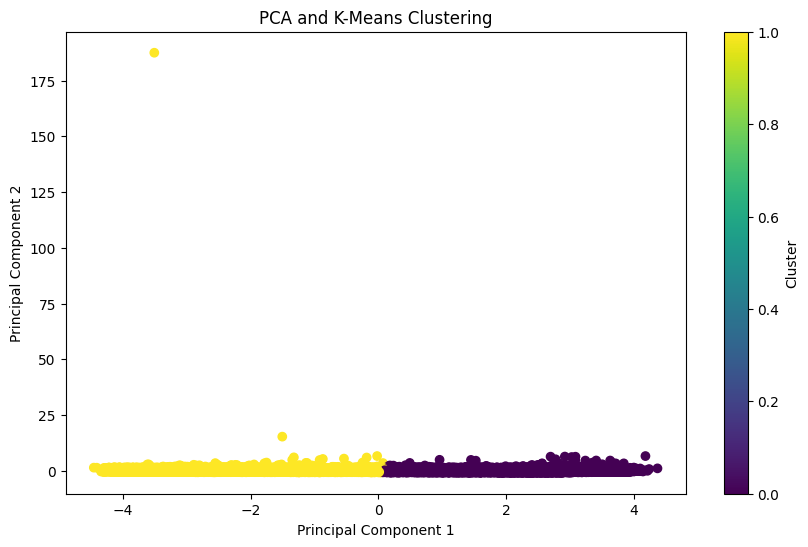

In [130]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=principalDf['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and K-Means Clustering')
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')
plt.show()

In [131]:
# Get the predicted probabilities of the positive class (fraudulent)
pred_probs = clf.predict_proba(features_scaled)[:, 1]

*Adjust the threshold for classification **default** to **fraudulent** unless proven otherwise*

In [132]:
threshold = 0.48  #lower threshold to increase the bias towards fraud
pred = (pred_probs >= threshold).astype(int)

*Making it better to look at and understand*

In [133]:
df['Anomaly'] = pred

*Visualisation of our DataFrame*

In [134]:
print(df.head(20))

    ApplicantReference  DefendantReference  SinistreDate  Status  Reference  \
0                    1                  11           574       0       5164   
1                    3                  12           202       0       7833   
2                    0                   3          1785       4        377   
3                   10                   6           202      13      25139   
4                   12                   9            17       0      34814   
5                    0                   8           997      30       1552   
6                   12                   0           208       0      31461   
7                   12                   0            17       0      31422   
8                   12                   7           485       0      33582   
9                   12                  11            17       0      36047   
10                   6                  10           252       0      12737   
11                   4                   6          

*Proportion of accepted and fraudulent statuses in each anomaly group*

In [135]:
anomaly_status = df.groupby('Anomaly')['SimplifiedStatus'].value_counts(normalize=True).unstack()
print(anomaly_status)

SimplifiedStatus         0         1
Anomaly                             
0                 0.999835  0.000165
1                 0.000803  0.999197


# Accuracy

In [136]:
# Splitting the data into a training set and a test set
features_train, features_test, labels_train, labels_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

# Training the model on the training set
clf.fit(features_train, labels_train)

# Test the model on the test set
labels_pred = clf.predict(features_test)

accuracy = (labels_pred == labels_test).mean()
print(f'Accuracy: {accuracy}')

Accuracy: 0.9975606624727179


## F1 Score

In [137]:
f1 = f1_score(labels_test, labels_pred, average='binary')  
print(f'F1 Score: {f1}')

F1 Score: 0.9799366420274551


AUC: 0.9986964399775787


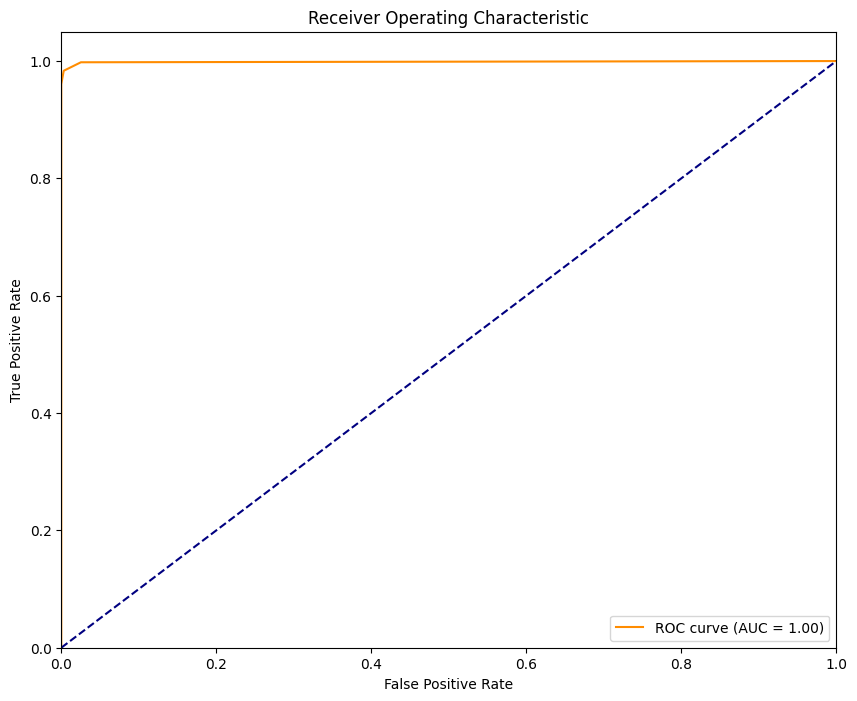

In [139]:

# Calculate the probabilities of the positive class
probs = clf.predict_proba(features_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(labels_test, probs)

# Calculate the AUC
auc = roc_auc_score(labels_test, probs)
print(f'AUC: {auc}')

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# THE HEATMAP ü™®

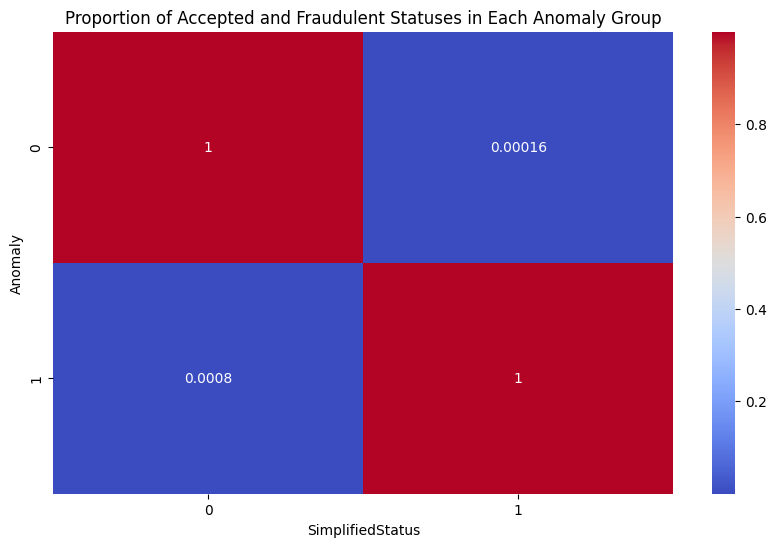

In [138]:
plt.figure(figsize=(10, 6))
sns.heatmap(anomaly_status, annot=True, cmap='coolwarm')
plt.title('Proportion of Accepted and Fraudulent Statuses in Each Anomaly Group')
plt.xlabel('SimplifiedStatus')
plt.ylabel('Anomaly')
plt.show()